# Data Loading


In [1]:
import pandas as pd
import glob

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Project_2'
file_pattern = file_path + '/*.csv'

# Use glob to get all file paths
all_files = glob.glob(file_pattern)

# Load and concatenate all CSV files into a single Data frame
data_list = [pd.read_csv(file) for file in all_files]
combined_data = pd.concat(data_list, ignore_index = True)

# Preview
print(combined_data.head())

            ride_id  rideable_type       started_at         ended_at  \
0  C1D650626C8C899A  electric_bike  2024-1-12 15:30  2024-1-12 15:37   
1  EECD38BDB25BFCB0  electric_bike   2024-1-8 15:45   2024-1-8 15:52   
2  F4A9CE78061F17F7  electric_bike  2024-1-27 12:27  2024-1-27 12:35   
3  0A0D9E15EE50B171   classic_bike  2024-1-29 16:26  2024-1-29 16:56   
4  33FFC9805E3EFF9A   classic_bike   2024-1-31 5:43   2024-1-31 6:09   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
1           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
2           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
3      Wells St & Randolph St     TA1305000030  Larrabee St & Webster Ave   
4  Lincoln Ave & Waveland Ave            13253   Kingsbury St & Kinzie St   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  
0   KA1503000043  41.903267

In [3]:
print(all_files)

['/content/drive/MyDrive/Colab Notebooks/Project_2/202401-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202402-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202403-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202404-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202405-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202406-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202407-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202408-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202409-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202410-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202411-divvy-tripdata.csv', '/content/drive/MyDrive/Colab Notebooks/Project_2/202412-divvy-tripdata.csv']


# Additional Features

In [4]:
# Convert to datetime if not already done
combined_data['started_at'] = pd.to_datetime(combined_data['started_at'])
combined_data['ended_at'] = pd.to_datetime(combined_data['ended_at'])

# Calculate ride length in minutes
combined_data['ride_length'] = (combined_data['ended_at'] - combined_data['started_at']).dt.total_seconds() / 60

# Extract day of the week
combined_data['day_of_week'] = combined_data['started_at'].dt.day_name()

# Preview the updated data
print(combined_data[['ride_length', 'day_of_week']].head())

# Check for any negative ride lengths
negative_ride_lengths = combined_data[combined_data['ride_length'] < 0]
print(f"Negative ride lengths: {len(negative_ride_lengths)}")


   ride_length day_of_week
0          7.0      Friday
1          7.0      Monday
2          8.0    Saturday
3         30.0      Monday
4         26.0   Wednesday
Negative ride lengths: 100


In [5]:
combined_data = combined_data[combined_data['ride_length'] >= 0]
print(len(combined_data))

5860468


In [6]:
# Count missing values per column
missing_counts = combined_data.isnull().sum()

# Display columns with missing values
print("Missing Values per Column:")
print(missing_counts[missing_counts > 0])

# Percentage of missing values
missing_percentage = (missing_counts / len(combined_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage[missing_percentage > 0])


Missing Values per Column:
start_station_name    1073894
start_station_id      1073894
end_station_name      1104599
end_station_id        1104599
end_lat                  7232
end_lng                  7232
dtype: int64

Percentage of Missing Values:
start_station_name    18.324373
start_station_id      18.324373
end_station_name      18.848307
end_station_id        18.848307
end_lat                0.123403
end_lng                0.123403
dtype: float64


In [7]:
# Fill missing station data with 'Unknown'
combined_data['start_station_name'] = combined_data['start_station_name'].fillna('Unknown')
combined_data['start_station_id'] = combined_data['start_station_id'].fillna('Unknown')
combined_data['end_station_name'] = combined_data['end_station_name'].fillna('Unknown')
combined_data['end_station_id'] = combined_data['end_station_id'].fillna('Unknown')

# Confirm no missing station data
print(combined_data[['start_station_name', 'end_station_name']].isnull().sum())


start_station_name    0
end_station_name      0
dtype: int64


In [8]:
# Drop rows with missing latitude/longitude
combined_data = combined_data.dropna(subset=['end_lat', 'end_lng'])

# Confirm cleanup
print(f"Remaining rows after dropping lat/lng: {len(combined_data)}")


Remaining rows after dropping lat/lng: 5853236


# EDA

In [9]:
import matplotlib.pyplot as plt

# Ride duration analysis
ride_length_stats = combined_data.groupby('member_casual')['ride_length'].describe()
print("Ride Length Statistics by User Type :")
print(ride_length_stats)

# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
combined_data['day_of_week'] = pd.Categorical(combined_data['day_of_week'], categories=day_order, ordered=True)
day_of_week_usage = combined_data.groupby(['member_casual', 'day_of_week']).size().unstack()
print("Day of Week Usage by User Type:")
print(day_of_week_usage)

# Bike type preference
bike_preference = combined_data.groupby(['member_casual', 'rideable_type']).size().unstack()
print("Bike Type Preference by User Type:")
print(bike_preference)


Ride Length Statistics by User Type :
                   count       mean        std  min  25%   50%   75%     max
member_casual                                                               
casual         2145733.0  21.111184  45.567183  0.0  7.0  12.0  23.0  1510.0
member         3707503.0  12.230551  21.754523  0.0  5.0   9.0  15.0  1500.0


<ipython-input-9-9fb72fdc12e2>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_usage = combined_data.groupby(['member_casual', 'day_of_week']).size().unstack()


Day of Week Usage by User Type:
day_of_week    Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
member_casual                                                                
casual         252961   231862     268690    264464  314983    444119  368654
member         534404   570462     610049    570384  525643    479519  417042
Bike Type Preference by User Type:
rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual               969076        1091442             85215
member              1759314        1889067             59122


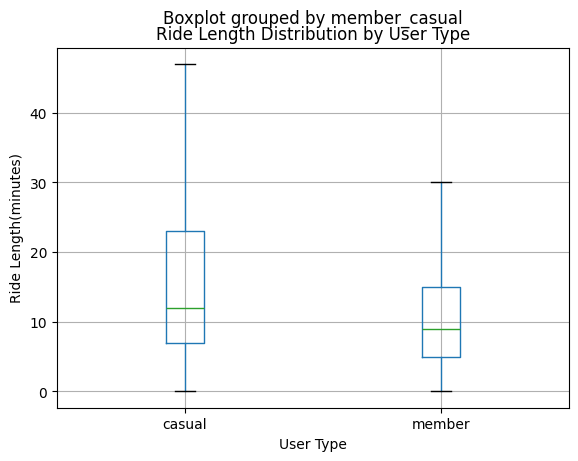

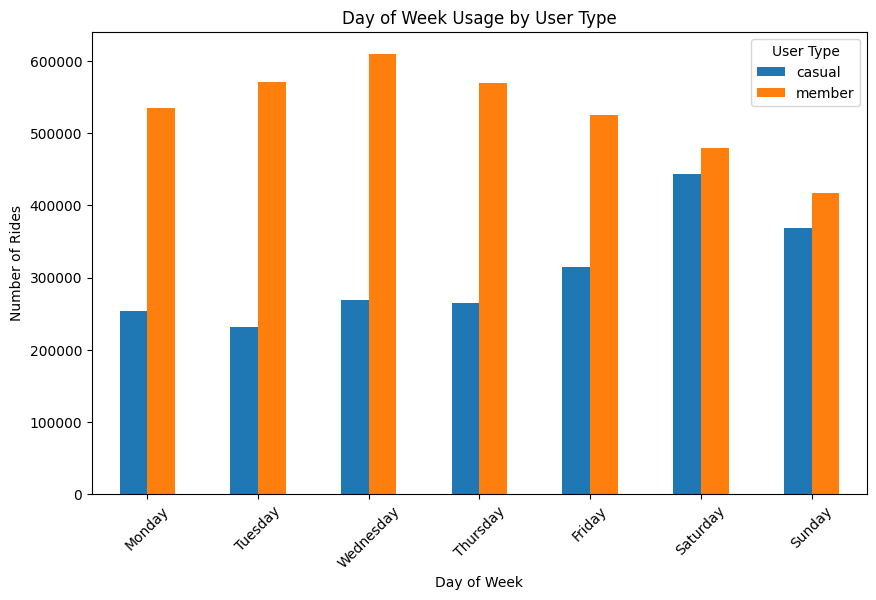

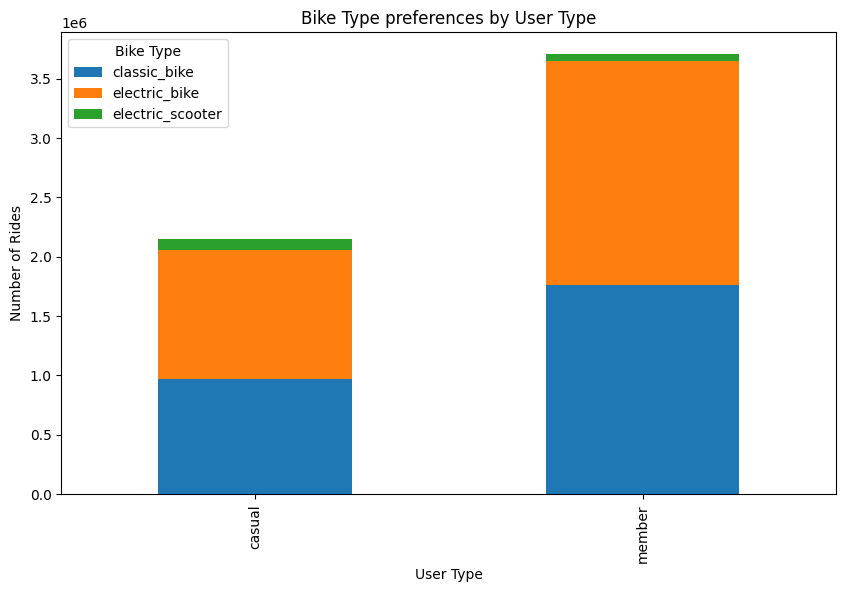

In [10]:
# Visualization
# 1. Ride duration
combined_data.boxplot(column='ride_length', by='member_casual', showfliers=False)
plt.title('Ride Length Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Ride Length(minutes)')
plt.show()

# 2. Day of week usage
day_of_week_usage.T.plot(kind='bar', figsize=(10, 6))
plt.title('Day of Week Usage by User Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

# 3. Bike Type Preferences
bike_preference.plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Bike Type preferences by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type')
plt.show()

# Analyze

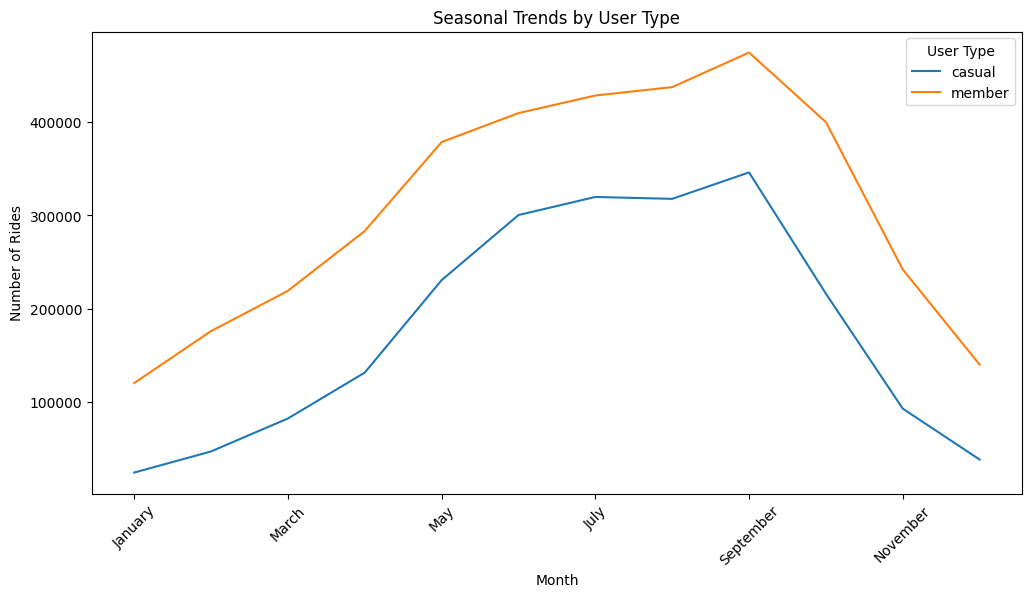

In [11]:
# Extract month from the started_at column
combined_data['month'] = combined_data['started_at'].dt.month_name()

# Group by user type and month
seasonal_trends = combined_data.groupby(['member_casual', 'month']).size().unstack()

# Reorder and fill missing months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to ensure all months are included, filling missing values with 0
seasonal_trends = seasonal_trends.reindex(columns=month_order, fill_value=0)

# Plot seasonal trends
seasonal_trends.T.plot(kind='line', figsize=(12, 6))
plt.title('Seasonal Trends by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()


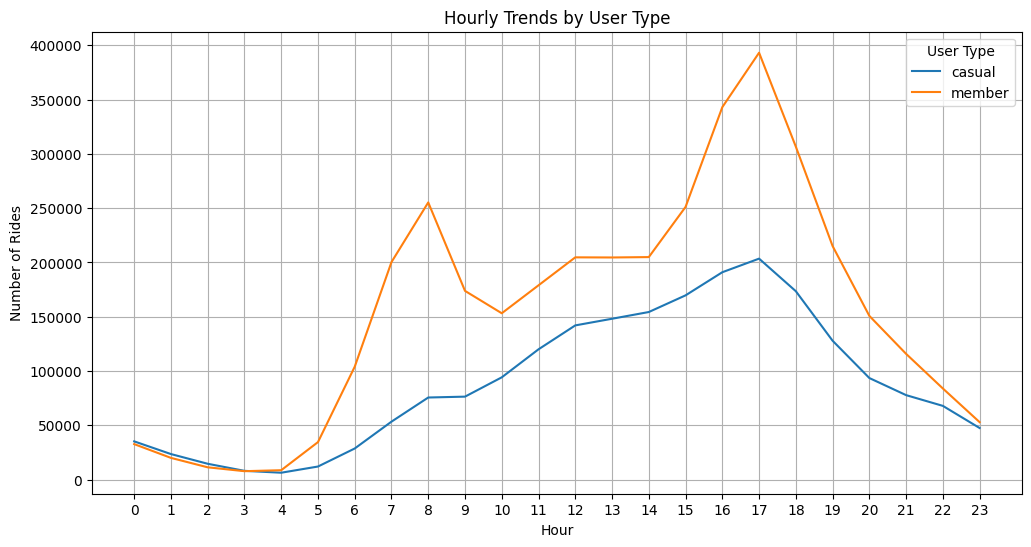

In [12]:
# Hourly Trend
# Extract hour
combined_data['hour'] = combined_data['started_at'].dt.hour

# Group by user type and hour
hourly_trends = combined_data.groupby(['member_casual', 'hour']).size().unstack()

# Plot hourly trends
hourly_trends.T.plot(kind='line', figsize=(12, 6))
plt.title('Hourly Trends by User Type')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

In [14]:
# Top Stations
# Top starting stations by user type
start_station_counts = combined_data.groupby(['member_casual', 'start_station_name']).size().unstack()

# Top 10 starting stations for both user types
print("Top starting stations for casual riders:")
print(start_station_counts.loc['casual'].sort_values(ascending=False).head(10))

print("Top Starting Stations for Memebers:")
print(start_station_counts.loc['member'].sort_values(ascending=False).head(10))

Top starting stations for casual riders:
start_station_name
Unknown                               411117.0
Streeter Dr & Grand Ave                50909.0
DuSable Lake Shore Dr & Monroe St      33966.0
Michigan Ave & Oak St                  25064.0
DuSable Lake Shore Dr & North Blvd     23042.0
Millennium Park                        22506.0
Shedd Aquarium                         21023.0
Dusable Harbor                         18394.0
Theater on the Lake                    16773.0
Michigan Ave & 8th St                  13459.0
Name: casual, dtype: float64
Top Starting Stations for Memebers:
start_station_name
Unknown                         662777.0
Kingsbury St & Kinzie St         29515.0
Clinton St & Washington Blvd     27732.0
Clinton St & Madison St          24887.0
Clark St & Elm St                24703.0
Wells St & Concord Ln            20667.0
Wells St & Elm St                20493.0
Clinton St & Jackson Blvd        20301.0
Dearborn St & Erie St            19487.0
Canal St & Madiso